<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Green's functions for the homogeneous acoustic wave equation</div>
        </div>
    </div>
</div>


<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.

##### Authors:
* Kristina Garina
* Ashim Rijal
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))

---

### Excercise:
Initialise Green's function in 1D, 2D and 3D cases of the acoustic wave equation and convolve them with an arbitrary source time function **(see Chapter 2, Section 2.2, Fig. 2.9)**

---

This exercise covers the following aspects:

* Learn how to define a source time function
* Calculation of analytical Green's function in the 1D, 2D, and 3D cases 
* Convolution of Green's function with source time function

---

**Please, execute first!**

In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Below we introduce the initial parameters: velocity, distance, length of seismogram, frequency, number of samples, time increment and geometry

In [2]:
#Initial parameters
c = 1.           # velocity m/s 
r = 2.           # distance from source
tmax = 5.        # length of seismogram (s)
f0 = 1          # Frequency (Hz)
nt = 3000       # number of time samples
dt = tmax/nt    # time increment
ts=0            # source time


# Geometry
xs=0            # coordinates of source
ys=0
zs=0

xr=r            # coordinates of receiver
yr=0
zr=0

## Source time function

Below we initialise time and calculate source time function

In [3]:
# Defining time

for i in range (nt+1):
    t=(np.arange(0,i)*dt)
time=np.zeros(nt) 
time[0:nt]=t

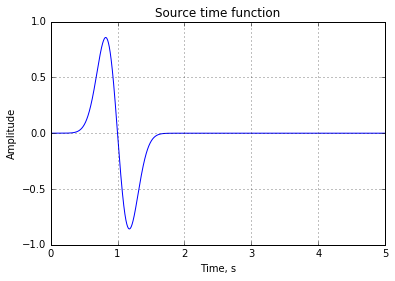

In [4]:
# Defining source time function

p=1./f0          # period
t0 = p/dt        # defining t0
sigma=4./p      

# Initialization of source-time function
src=np.zeros(nt) 
source=np.zeros(nt)

# Initialization of first derivative of gaussian
for it in range(nt):
    t=(it-t0)*dt
    src[it]=-2*sigma*t*np.exp(-(sigma*t)**2)
source[0:nt]=src

# Plotting of source time function
plt.plot(time, src)
plt.title('Source time function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## 1D Green's function  

Below we calculate the Green's function for the 1D acoustic problem, its convolution with a source time function. Please note, that we center the source time function around t=0.

In the 1D case, Green's function is proportional to a Heaviside function. As the response to an arbitrary source time function can be obtained by convolution this implies that the propagating waveform is the integral of the source time function.


$G_1=\dfrac{1}{2c}H(t-\dfrac{|r|}{c}) $

$r=x$


---

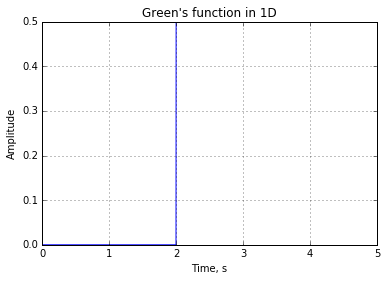

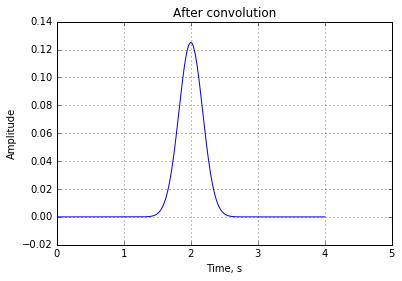

In [5]:
# Calculating Green's function in 1D

G=np.zeros(nt)      # initialization G with zeros

for i in range (nt):
    if (((time[i]-ts)-abs(xr-xs)/c)>=0):
        G[i]=1./(2*c)
    else:
        G[i]=0

# Plotting Green's function in 1D
plt.plot(time, G)
plt.title("Green's function in 1D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Convolution of Green's function with the 1st derivative of a Gaussian
G1=np.convolve(G, source*dt)[:len(G)]

# Plotting convolved Green's function in 1D
plt.plot(time-t0*dt, G1)
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()

## 2D Green's function  

Below we calculate the Green's function for 2D acoustic problem, its convolution with the source time function. Please note, that we center the source time function around t=0. 

$G_2=\dfrac{1}{2\pi c^2}\dfrac{H(t-\dfrac{|r|}{c})}{\sqrt{t^2-\dfrac{r^2}{c^2}}}$ 

$r = \sqrt{x^2+y^2}$


---

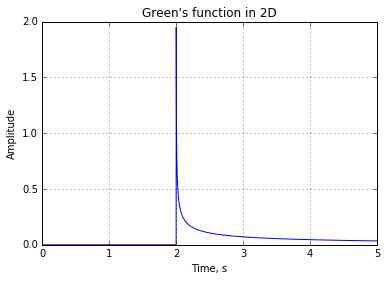

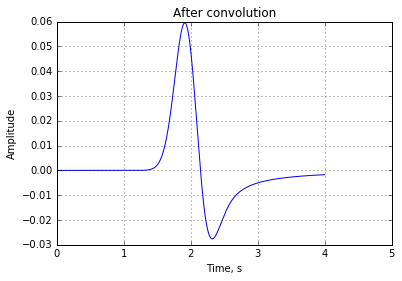

In [6]:
# Calculation of Green's function for 2D

G=np.zeros(nt)                    # initialization G with zeros
r=np.sqrt((xs-xr)**2+(ys-yr)**2)

for i in range (nt):
    if (((time[i]-ts)-abs(xr-xs)/c)>0):
        G[i]=(1./(2*np.pi*c**2))*(1./np.sqrt((time[i]-ts)**2-(r**2/c**2)))
    else:
        G[i]=0
           
# Plotting Green's function in 2D
plt.plot(time, G)
plt.title("Green's function in 2D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Convolution of Green's function with the 1st derivative of a Gaussian
G2=np.convolve(G, source*dt)[:len(G)]

# Plotting convolved Green's function in 1D
plt.plot(time-t0*dt,G2)
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim((0, tmax))
plt.grid()
plt.show()

## 3D Green's function  

Below we calculate the Green's function for 3D acoustic problem, its convolution with the source time function. Please note, that we center the source time function around t=0. 

$G_3=\dfrac{1}{4 \pi c^2 r}\delta(t-r/c)$ 

$r = \sqrt{x^2+y^2+z^2}$


---

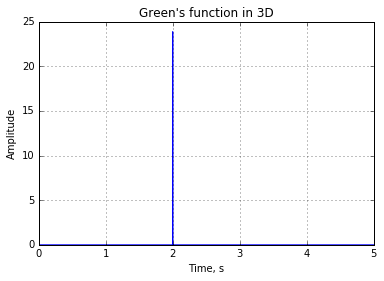

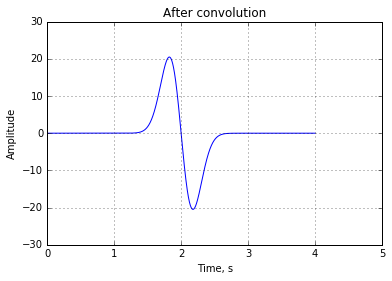

In [7]:
# Calculation of Green's function for 3D case

G=np.zeros(nt)                               # initialization G with zeros

# Defining time
for i in range (nt+1):
    t=(np.arange(0,i)*dt)
new_time=np.zeros(nt) 
new_time[0:nt]=t
new_time=t[2]-t[1]

r=np.sqrt((xs-xr)**2+(ys-yr)**2+(zs-zr)**2)     # defining the distance to receiver
amp=1./(4*np.pi*(c**2)*r)                       # defining amplitudes
t_arr=ts+(r/c)                               # time arrival
i_arr=t_arr//new_time
b=int(i_arr)
G[b]= amp/dt

# Plotting Green's function in 3D
plt.plot(time, G)
plt.title("Green's function in 3D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Convolution of Green's function with the 1st derivative of a Gaussian
G3=np.convolve(G, source)[:len(G)]

# Plotting convolved Green's function in 1D
plt.plot(time-t0*dt, G3)
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()